# **42577 - Introduction to Business Analytics**

**Author:** *Chao Yu(s200079), Maria Konstantina Papaioannou(s195550), Shubham Ingole(s200092), Prasad Jagtap(s200109)*


# Project structure and components

> 1. Prediction Challenge 
2.   Exploratory Analysis


#  Prediction Challenge

# **Content :**



1.   **Data preparation, Processing and cleaning**

>1.   Data Loading
2.    Identifing column data types
3.    Excluding Irrelevant Columns
4.    Rename Columns 
5.    Handling Missing Values
6.    Creating Continent column

2.   **Prediction challenge**
     
>1.   PCA Analysis
2.   Prediction challenge Part-1
3.   Prediction challenge Part-2


In [1]:
!pip install pycountry_convert

#Using country data derived from wikipedia, this package provides conversion functions between ISO country names, 
#country-codes, and continent names

You should consider upgrading via the 'c:\users\shubham ingole\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#import required packages

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import pycountry_convert as pc
from sklearn.cross_decomposition import PLSRegression
from sklearn import decomposition
import seaborn as sns
import itertools
from scipy import stats
import plotly.express as px

# **1. Data Preperation, Preprocessing and Cleaning**


> At the very initial stage, we wanted to take an overview of the given dataset for the `cites` and wanted to identify the different rows and columns for the associated factors in the scope of the analysis. Later, looking at the data type of each column, further, we looked into the missing values along with excluding the irrelevant data and renamed a few of them for constructive mapping and further analysis.




### 1.1 Data Loading

Overview of the given datatset with respect to the `cities` and affecting factors causing $CO_2$ emission 

In [3]:
#Load the dataset.(Reading dataset)
df_cities = pd.read_excel('Cities.xls')

#Let's take a look at the data.
df_cities.head()
#df_cities.describe()

,Unnamed: 0,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


### 1.2 Identify Column Data Types

> Identifying the data types in the corresponding column of the `cities` data file. This section examine data types and figure out which should be turned into different data types.

In [4]:
pd.set_option('display.max_rows', 500)
df_cities.info(null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 79 columns):
Unnamed: 0                                         int64
City                                               object
cityID                                             int64
clusterID                                          int64
Typology                                           object
Country                                            object
Car Modeshare (%)                                  float64
Public Transit Modeshare (%)                       float64
Bicycle Modeshare (%)                              object
Walking Modeshare (%)                              float64
Gasoline Pump Price (USD/liter)                    float64
Road Deaths Rate (per 1000)                        float64
Subway Length (km)                                 float64
Subway Length Density (per km)                     float64
Subway Stations per Hundred Thousand               float64
Subway Ridership per

### 1.3 Excluding Irrelevant Columns

> In order to proceed ahead, we do not consider the columns `Unnamed`, `cityID` and `clusterID` therefore, respective piece of code represents the drop for the corresponding columns

In [5]:
df_cities = df_cities.drop(['Unnamed: 0','cityID','clusterID'],axis = 1)
df_cities.head()

,City,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,Baltimore(MD),Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,Melbourne,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,Niamey,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,Hanoi,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,Urumqi,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8,0.0,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


### 1.4 Rename Columns

> Below piece of code represents the modifiction in the column names of the updated `cities` dataset by replacing spaces with underscore. 

In [6]:

def clean_name(name):
    name_split = name.split('(')
    return name_split[0].strip(" ").replace(" ", "_")

df_cities.rename(columns = clean_name,inplace = True)
df_cities.head()

,City,Typology,Country,Car_Modeshare,Public_Transit_Modeshare,Bicycle_Modeshare,Walking_Modeshare,Gasoline_Pump_Price,Road_Deaths_Rate,Subway_Length,...,Highway_Proportion,Metro_Propensity_Factor,BRT_Propensity_Factor,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor
0,Baltimore(MD),Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,Melbourne,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,Niamey,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,Hanoi,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,Urumqi,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8,0.0,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


### 1.5 Handling Missing Values

> Evaluating the percentage of **NaN** values from the `cities` dataset just to make sure we have refined data to process further.

In [7]:
#Percentage of nans per column
df_num = 100* df_cities.isna().sum()/df_cities.shape[0]
df_num

City                                                0.000000
Typology                                            0.000000
Country                                             0.000000
Car_Modeshare                                      32.326284
Public_Transit_Modeshare                           31.419940
Bicycle_Modeshare                                  44.108761
Walking_Modeshare                                  39.879154
Gasoline_Pump_Price                                 0.000000
Road_Deaths_Rate                                    0.302115
Subway_Length                                       0.000000
Subway_Length_Density                               0.000000
Subway_Stations_per_Hundred_Thousand                0.000000
Subway_Ridership_per_Capita                         0.000000
Subway_Age                                          0.000000
BRT_Length                                          0.302115
BRT_System_Length_Density                           0.604230
BRT_Stations_per_Hundred

> It is observed that if a certain column has more than a 50% **NaN** values, model turns out to be non-descriptive and therefore, it is not an ideal situation to save it leading to which, we are considering to discard the respective values. However, if we replace **NaN**s with the mean value of the columns, the feature loses it's descriptive value.

In [8]:
#If a column has more than a 50% model is non descriptive and cannnot save it/so we discard them
#even if we replace nans with a mean value of the columns ,the feature loses its descriptive value.
null_lst = df_num[df_num.values >=50].index.values
null_lst

array(['Congestion', 'Congestion_AM_Peak', 'Congestion_PM_Peak',
       'Traffic_Index', 'Travel_Time_Index', 'Inefficiency_Index'],
      dtype=object)

> Later, concerning the above hypothesis, we are considering to create a separate array named `null_lst` in order to remove the corresponding columns from the master file as mentioned in the below piece of code.   

In [9]:
##drop columns
df_cities.drop(null_lst,inplace = True,axis = 1)

> Now, some of the columns are supposed to be added and manipulated with the respective mean values as mentioned below.

In [10]:
##fill null values with the mean in its column
df_cities.replace(' ',np.nan,inplace=True)
df_cities.fillna(df_cities.mean(),inplace = True)

### 1.6 Creating Continent column

In [11]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_cities['Continent'] = df_cities['Country'].apply(country_to_continent)
df_cities.head()


,City,Typology,Country,Car_Modeshare,Public_Transit_Modeshare,Bicycle_Modeshare,Walking_Modeshare,Gasoline_Pump_Price,Road_Deaths_Rate,Subway_Length,...,Metro_Propensity_Factor,BRT_Propensity_Factor,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Continent
0,Baltimore(MD),Auto Sprawl,United States,85.000000,6.1,0.30000,2.600000,0.66,8.5,24.9,...,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187,North America
1,Melbourne,Auto Innovative,Australia,80.000000,14.0,2.00000,4.000000,1.11,5.4,0.0,...,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910,Oceania
2,Niamey,Congested Emerging,Niger,47.688694,9.0,2.00000,60.000000,1.02,26.4,0.0,...,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312,Africa
3,Hanoi,MetroBike Emerging,Vietnam,8.000000,10.0,2.00000,18.270352,0.90,24.5,0.0,...,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113,Asia
4,Urumqi,MetroBike Emerging,China,21.700000,54.7,5.12587,18.270352,1.16,18.8,0.0,...,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,Asia


# **2. Prediction Challenge**

## **2.1 PCA Analysis**

> Principle Component Analysis (PCA) is performed for dimensional reduction.
 * Performing *standardization* to scale the available data in such a way that all the variables and their values lie within linear or same range.
 * Computing *variance matrix* expresses the correlation between different variables in the dataset. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model.








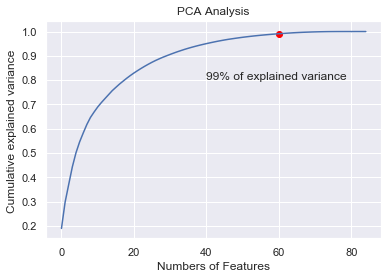

In [12]:
sns.set()
pca=decomposition.PCA()
df_pca = pd.get_dummies(df_cities, columns = ['Typology','Continent'])
df_pca = df_pca.drop(['Country','City'],axis =1)
df_pca = (df_pca-df_pca.mean())/df_pca.std()
pca.fit(df_pca)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.xlabel('Numbers of Features')
plt.ylabel('Cumulative explained variance ')
plt.plot(range(len(expl)),cdf)
plt.scatter(60,cdf[60],color = 'red')
plt.text(40,0.8,'99% of explained variance')
plt.title('PCA Analysis')
plt.show()

The PCA shows that 99% of the variances can be represented by 60 features. In our predictive models, it is better to choose ML-models that can select important features.

## **2.2 Part 1**

#### One-hot encoding

In [13]:
df_prediction_one = pd.get_dummies(df_cities, columns = ['Typology','Continent'])

#### Standarization

In [14]:
X = df_prediction_one.drop(['CO2_Emissions_per_Capita','Country','City','Pollution_Index'],axis = 1)
X = (X-X.mean())/X.std()
Y = df_prediction_one['CO2_Emissions_per_Capita']

#### Data split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,shuffle = False,random_state=0)
print(len(X_train),len(X_test))

221 110


#### Lasso Model

In [16]:
regr = LassoCV(cv=10, max_iter=10000)
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print(r2)

11.7623076139109
0.7397657189570506


## **2.3 Part 2**

#### One-hot encoding

In [17]:
df_prediction_two =  df_cities.copy()
df_prediction_two = pd.get_dummies(df_prediction_two,columns = ['Typology'])

#### Standarization

In [18]:
subset_column_lst = list(df_prediction_two.columns.drop(['Continent','Country','City']))
df_prediction_two[subset_column_lst] = df_prediction_two[subset_column_lst].apply(lambda x: (x - x.mean() /x.std()))

#### Test, Training data split

In [19]:
test = df_prediction_two[(df_prediction_two.Continent == 'North America') | (df_prediction_two.Continent == 'South America')]
train = df_prediction_two[~(df_prediction_two.Continent == 'North America') &~(df_prediction_two.Continent == 'South America')]

#### Linear Regression Model

In [20]:
X_train = train.drop(['CO2_Emissions_per_Capita','Country','City','Continent','Pollution_Index'],axis = 1)

y_train = train['CO2_Emissions_per_Capita']


X_test = test.drop(['CO2_Emissions_per_Capita','Country','City','Continent','Pollution_Index'],axis = 1)


y_test = test['CO2_Emissions_per_Capita']

pls = LinearRegression()
# pls = PLSRegression(n_components=70)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)
print(mean_squared_error(y_test, y_pred), 
      r2_score(y_test, y_pred))


22.943922245110492 0.6228914625214572


## **Conclusion**

Initally, we wanted to state that `generalization` and `transferability` are two very different properties. The goal of any supervised learning predictive model can be thought of as approximating the distribution of some population given a limited sample so that it can predict the target values of unseen data taken from that same population with a small error. This is known as `generalization`. However `transfer learning` concerns an entirely different problem: can a model be trained on a sample taken from one population in such a way that it can achieve a low error rate when predicting on data taken from a `different` population [1]?.

Owing to the relatively small amount of training data available to us, and the requirement that the resulting model should not only generalize well, but even transfer to data taken from a different (we can assume, correlated) population, the only realistic models to consider in this case are linear models because of their small amount of degrees of freedom. Models with many parameters, such as DL models, would likely overfit the limited training data and not transfer well to the test set. 

Following this line of thought, `Linear Regression`, and regularization strategies like the `Lasso` are obvious choices. We found that the `Lasso` model generalizes the best (part 1), whereas the unregularized `Linear Regression` model transferred the best.



References

1. Pan S J, Yang Q. A survey on transfer learning[J]. IEEE Transactions on knowledge and data engineering, 2009, 22(10): 1345-1359.
